# Todo

[ ] how to only process the last 2 years of data to speed things up
[ ] implement the below into a script
[ ] put the script on pulsar and run in cronjob

# Objective
Here we convert the the raw mfrsr data into netcdf files. In the process data is chopped into daily files. Note, no additional actions are take. It is not recommended to use sun positions here. 

# New: inplement the new WorkplanerDaily

In [36]:
import surfradpy.products.mfr_raw2netcdf as srfr2nc

In [141]:
import surfradpy.scripts.surfrad_mfrsr_raw2netcdf as srfscpt

In [149]:
reload(srfscpt)

<module 'surfradpy.scripts.surfrad_mfrsr_raw2netcdf' from '/Users/htelg/prog/SURFRAD/surfradpy/scripts/surfrad_mfrsr_raw2netcdf.py'>

In [150]:
srfscpt.run(prefix='/Volumes/grad/', log_folder='/Users/htelg/.processlogs/', test = True)

start time: 2026-02-13 13:31:37.565273
bnd
Get all files in /Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw with "files_between" function and start: 2025-12-15 13:31:37.565394, end: 2026-02-13 13:31:37.565394 and glob pattern: *.xmd
bnd workplan.shape: (4, 3)


TypeError: Workplanner.process() got an unexpected keyword argument 'save'

In [136]:
reload(srfr2nc)
reload(srfr2nc.prowo)
reload(srfr2nc.prowo.prodlab)

<module 'productomator.lab' from '/Users/htelg/prog/productomator/productomator/lab.py'>

In [137]:
end = pd.Timestamp.now()
start = end - pd.to_timedelta(14, 'D')
self = srfr2nc.MfrsrRawToNetcdf('/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/raw/',
                                '/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v{version}',
                                name_pattern_netcdf = '{year}/{site}_mfrsr_raw_{date}.nc',
                                # glob_pattern_raw='*.xmd',
                                start=start,
                                end=end,
                                # site='tbl',
                                version='0.3',
                                path2surfrad_database='/Users/htelg/prog/SURFRAD/notebooks/databases/surfrad_database.db',
                                site = 'tbl',
                                # reporter=None,
                                verbose=True,
                                                           )

start time: 2026-02-13 12:42:35.999860


In [138]:
self.masterplan

Get all files in /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw with "files_between" function and start: 2026-01-30 12:42:35.869066, end: 2026-02-13 12:42:35.869066 and glob pattern: *.xmd


,p2f_in,p2f_out,day_complete
2026-01-30,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-01-31,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-01,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-02,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-03,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-04,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-05,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-06,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-07,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True
2026-02-08,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,True


In [139]:
self.workplan

Output file /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.netcdf/v0.3/2026/tbl_mfrsr_raw_20260213.nc is not complete and will be re-processed.


,p2f_in,p2f_out,day_complete
2026-02-13,[/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/...,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.n...,False


In [140]:
import productomator

# Rund the script

In [1]:
import surfradpy.scripts.surfrad_mfrsr_raw2netcdf as srfr2nc

In [3]:
reload(srfr2nc)

<module 'surfradpy.scripts.surfrad_mfrsr_raw2netcdf' from '/Users/htelg/prog/SURFRAD/surfradpy/scripts/surfrad_mfrsr_raw2netcdf.py'>

In [4]:
reporter = srfr2nc.run(prefix = '/Volumes/grad', 
                db_path='/Users/htelg/prog/SURFRAD/notebooks/databases/surfrad_database.db',
                log_folder=None #'/Users/htelg/.processlogs/'
                      )

start time: 2026-01-30 14:08:59.889803
bnd
opening file /Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw/2025/bnd_mfrsr_20251201_020002.xmd ... done
1
Last file was incomplete
bnd workplan.shape: (8, 2)
...number of cleanes: 0
number of errors: 0
number of warnings: 0
time finished: 2026-01-30 14:09:04.833491
total processing time: 0.0013732466666666666 hours


FileNotFoundError: [Errno 2] No such file or directory: '/Users/htelg/.processlogs/surfrad_mfr_raw2netcdf.log'

# This are the internals of the script

In [52]:
import surfradpy.mfr_raw2netcdf as mfr_r2nc
import surfradpy.database as sfp_db
import productomator.lab as prolab


In [101]:
reload(mfr_r2nc)
reload(sfp_db)

<module 'surfradpy.database' from '/Users/htelg/prog/SURFRAD/surfradpy/database.py'>

In [102]:
path = pl.Path('../../../databases/surfrad_database.db')
prefix = '/Volumes/grad'

In [103]:
reporter = prolab.Reporter('surfrad_mfr_raw2netcdf', 
                             log_folder='/Users/htelg/.processlogs/',
                             reporting_frequency=(6, 'h'),
                          )


sites = [
         #'bnd',
#           'dra',
#          'gwn',
#          'psu', 
#          'sxf',
         'tbl',
         # 'fpe',
]

end = pd.Timestamp.now()
start = start - pd.to_timedelta(60, 'D')

# end = pd.to_datetime('2026-01-31')
# start = pd.to_datetime('2026-01-27')
for site in sites:
    print(site)
    path_in = f'{prefix}/Inst/MFR/SURFRAD/{site}/mfrsr/raw/'
    ci = mfr_r2nc.MfrsrRawToNetcdf(path_in,
                                  # f'{prefix}/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v{{version}}/',
                                  f'~/tmp/raw2netcdf/{site}/mfrsr/raw.netcdf/v{{version}}/',
                                  '{year}/{site}_mfrsr_raw_{year}{month}{day}.nc',
                                  # glob_pattern_raw=f'[{dt.year - 1},{dt.year}]/*.xmd',
                                  # glob_pattern_raw='202[56]/*.xmd',
                                  glob_pattern_raw='*.xmd',
                                   start = start,
                                   end = end,
                                  # verbose = True,
                                  site = site,
                                  path2surfrad_database  = '../../../databases/surfrad_database.db',
                                   reporter = reporter,
                              )
    self = ci
    # ci.workplan = ci.workplan[::-1]
    print(f'{site} workplan.shape: {ci.workplan.shape}')
    # ci.masterplan['processed_files'].iloc[0].p2out
    # ci.masterplan['raw_files'].iloc[0].p2f_in
    # ci.workplan
    if 1:
        out = ci.process(verbose=True, save=False, justone = False)
        break
    else:
        out = ci.process(verbose=True)

reporter.wrapup()

start time: 2026-02-03 11:15:17.575793
tbl
Get all files in /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw with "files_between" function and start: 2025-11-28 00:00:00, end: 2026-02-03 11:15:17.576419 and glob pattern: *.xmd
opening file /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2025/tbl_mfrsr_20251128_010830.xmd ... done
1
No rawfiles have been processe yet, start from the beginning
tbl workplan.shape: (254, 2)
......

/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py:283: UserWarning: Bad record length indicator 0 at byte 6461; treating as end-of-data
  warnings.warn(
/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py:283: UserWarning: Bad record length indicator 0 at byte 5551; treating as end-of-data
  warnings.warn(
/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py:283: UserWarning: Bad record length indicator 0 at byte 6691; treating as end-of-data
  warnings.warn(


...............................................

/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py:238: UserWarning: Truncated record: reclen=51 at data index 42930, data_length=42973
  warnings.warn(
/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py:348: UserWarning: Truncated record while unpacking 12-bit values at data index 42972, data_length=42973
  warnings.warn(


...............number of cleanes: 0
number of errors: 0
number of warnings: 0
time finished: 2026-02-03 11:15:31.535692
total processing time: 0.0038777497222222223 hours


## Why do those gaps appear

In [52]:
import surfradpy.mfr_raw2netcdf as mfr_r2nc
import surfradpy.database as sfp_db
import productomator.lab as prolab


In [67]:
reload(mfr_r2nc)
reload(sfp_db)

<module 'surfradpy.database' from '/Users/htelg/prog/SURFRAD/surfradpy/database.py'>

In [68]:
path = pl.Path('../../../databases/surfrad_database.db')
prefix = '/Volumes/grad'

In [87]:
reporter = prolab.Reporter('surfrad_mfr_raw2netcdf', 
                             log_folder='/Users/htelg/.processlogs/',
                             reporting_frequency=(6, 'h'),
                          )


# sites = [
         #'bnd',
#           'dra',
#          'gwn',
#          'psu', 
#          'sxf',
site =  'tbl'
         # 'fpe',
# ]

# end = pd.Timestamp.now()
# start = start - pd.to_timedelta(60, 'D')

end = pd.to_datetime('2026-01-31')
start = pd.to_datetime('2026-01-27')
for i in range(18):
    print(f'idx: {i}')
    path_in = f'{prefix}/Inst/MFR/SURFRAD/{site}/mfrsr/raw/'
    ci = mfr_r2nc.MfrsrRawToNetcdf(path_in,
                                  # f'{prefix}/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v{{version}}/',
                                  f'~/tmp/raw2netcdf/{site}/mfrsr/raw.netcdf/v{{version}}/',
                                  '{year}/{site}_mfrsr_raw_{year}{month}{day}.nc',
                                  # glob_pattern_raw=f'[{dt.year - 1},{dt.year}]/*.xmd',
                                  # glob_pattern_raw='202[56]/*.xmd',
                                  glob_pattern_raw='*.xmd',
                                   start = start,
                                   end = end,
                                  # verbose = True,
                                  site = site,
                                  path2surfrad_database  = '../../../databases/surfrad_database.db',
                                   reporter = reporter,
                              )
    self = ci
    if i!=0:
        if np.all(ci.workplan == old_wp):
            i+=1
    old_wp = ci.workplan.copy()
    ci.workplan = ci.workplan.iloc[:(i+1)]
    # print(ci.workplan)
    # ci.workplan = ci.workplan[::-1]
    # print(f'{site} workplan.shape: {ci.workplan.shape}')
    # ci.masterplan['processed_files'].iloc[0].p2out
    # ci.masterplan['raw_files'].iloc[0].p2f_in
    # ci.workplan
    if 0:
        out = ci.process(verbose=True, save=False, justone = False)
        break
    else:
        out = ci.process(verbose=True)

reporter.wrapup()

start time: 2026-02-03 10:48:40.821925
idx: 0
Get all files in /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw with "files_between" function and start: 2026-01-27 00:00:00, end: 2026-01-31 00:00:00 and glob pattern: *.xmd
opening file /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260127_010715.xmd ... done
1
No rawfiles have been processe yet, start from the beginning
                                              p2f_in  \
3  /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...   

                           fname  
3  tbl_mfrsr_20260127_010715.xmd  
.idx: 1
Get all files in /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw with "files_between" function and start: 2026-01-27 00:00:00, end: 2026-01-31 00:00:00 and glob pattern: *.xmd
opening file /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260127_010715.xmd ... done
1
No rawfiles have been processe yet, start from the beginning
                                              p2f_in  \
3  /Volumes/grad/Inst/MFR/SURFR

In [93]:
ci.masterplan['raw_files']

,p2f_in,fname
3,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_010715.xmd
0,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_060614.xmd
2,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_121151.xmd
1,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_181207.xmd
7,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_010716.xmd
4,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_060616.xmd
6,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_121346.xmd
5,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_181404.xmd
8,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260129_010839.xmd
10,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260129_060740.xmd


In [86]:
np.all(ci.workplan == old_wp)

np.True_

In [84]:
ci.workplan

,p2f_in,fname
3,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_010715.xmd
0,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_060614.xmd
2,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_121151.xmd
1,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260127_181207.xmd
7,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_010716.xmd
4,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_060616.xmd
6,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_121346.xmd
5,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260128_181404.xmd
8,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260129_010839.xmd
10,/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2...,tbl_mfrsr_20260129_060740.xmd


In [88]:
version = '0.3'
days = 7
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2026/
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/v0.3/2026/
p2fld = f'~/tmp/raw2netcdf/{site}/mfrsr/raw.netcdf/v{{version}}/2026'

In [89]:
pl.Path(p2fld.format(site = s, version = version))

PosixPath('~/tmp/raw2netcdf/tbl/mfrsr/raw.netcdf/v0.3/2026')

In [90]:
sites = [
    # 'gwn', 'psu', 
         # 'sxf', 
         'tbl', 
    # 'bnd', 'fpe', 'dra'
        ]
data = {}
for s in sites:
    # print(s)
    fl = list(pl.Path(p2fld.format(site = s, version = version)).expanduser().glob('*.nc'))
    fl.sort()
    
    fl[- days:]
    
    ds = xr.open_mfdataset(fl[- days:])
    
    data[s] = ds

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_41465/1113038636.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend().remove()


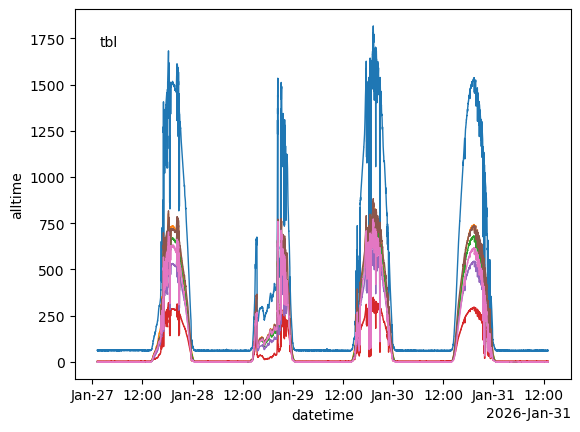

In [91]:
f, aa = plt.subplots(len(data.keys()), sharex=True, gridspec_kw={'hspace': 0})
aa = [aa,]
for e,s in enumerate(data):
    a = aa[e]
    ds  = data[s]
    ds.alltime.plot.line(x='datetime', ax = a, lw = 1)
    a.legend().remove()
    a.text(0.05, 0.9, s, transform = a.transAxes)

end = pd.Timestamp.now(tz = 'UTC')
start = end - pd.to_timedelta(days, 'D')
# aa[-1].set_xlim(start, end)

# Next: during processing collect all the metadata and confirm match between available information from filename and content 